In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
hr = pd.read_csv("HR_Data.csv")

In [4]:
hr.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [5]:
hr.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

In [7]:
hr.shape

(8998, 18)

In [8]:
hr.drop(["SLNO","Candidate.Ref","Location"],axis=1,inplace=True)

In [9]:
hr.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,34,Joined


In [10]:
hr.shape

(8998, 15)

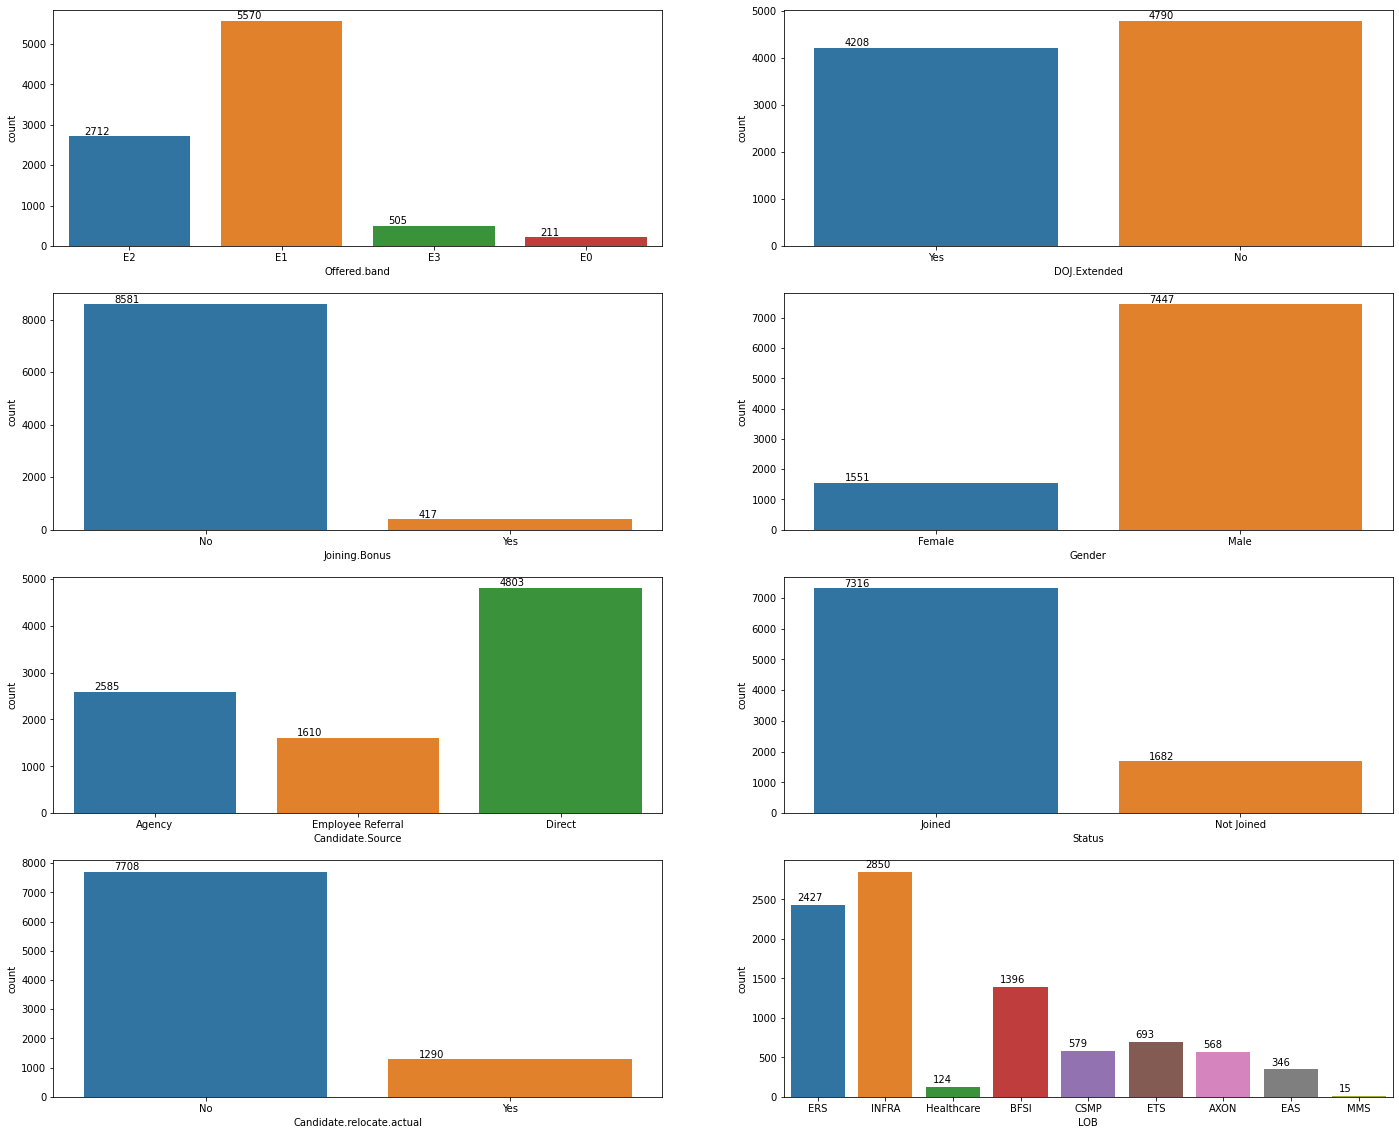

In [11]:
fig,axes = plt.subplots(4,2,figsize=(24,20))
g = sns.countplot(x=hr["Offered.band"],ax=axes[0,0])
for i in g.patches:
    g.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))
g1 = sns.countplot(x=hr["DOJ.Extended"],ax=axes[0,1])
for i in g1.patches:
    g1.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))
g2 = sns.countplot(x=hr["Joining.Bonus"],ax=axes[1,0])
for i in g2.patches:
    g2.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))
g3 = sns.countplot(x=hr["Gender"],ax=axes[1,1])
for i in g3.patches:
    g3.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))
g4 = sns.countplot(x=hr["Candidate.Source"],ax=axes[2,0])
for i in g4.patches:
    g4.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))
g5 = sns.countplot(x=hr["Status"],ax=axes[2,1])
for i in g5.patches:
    g5.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))
g6 = sns.countplot(x=hr["Candidate.relocate.actual"],ax=axes[3,0])
for i in g6.patches:
    g6.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))
g7 = sns.countplot(x=hr["LOB"],ax=axes[3,1])
for i in g7.patches:
    g7.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+50))

<AxesSubplot:xlabel='Status', ylabel='count'>

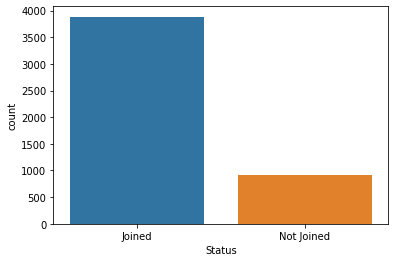

In [12]:
a = hr[hr["DOJ.Extended"]=="No"]
sns.countplot(x = a["Status"])

In [13]:
a["Status"].value_counts()

Joined        3884
Not Joined     906
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

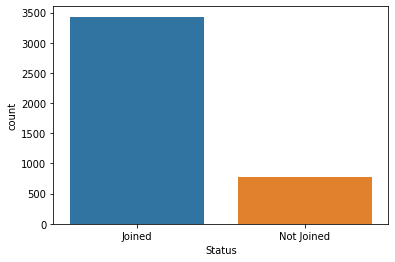

In [14]:
a = hr[hr["DOJ.Extended"]=="Yes"]
sns.countplot(x = a["Status"])

In [15]:
a["Status"].value_counts()

Joined        3432
Not Joined     776
Name: Status, dtype: int64

In [16]:
hr.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,34,Joined


In [17]:
hr["DOJ.Extended"].replace({"Yes":1,"No":0},inplace=True)

In [18]:
hr["Joining.Bonus"].replace({"Yes":1,"No":0},inplace=True)
hr["Candidate.relocate.actual"].replace({"Yes":1,"No":0},inplace=True)

In [19]:
hr.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Age,Status
0,1,14,30,E2,-20.79,13.16,42.86,0,0,Female,Agency,7,ERS,34,Joined
1,0,18,30,E2,50.00,320.00,180.00,0,0,Male,Employee Referral,8,INFRA,34,Joined
2,0,3,45,E2,42.84,42.84,0.00,0,0,Male,Agency,4,INFRA,27,Joined
3,0,26,30,E2,42.84,42.84,0.00,0,0,Male,Employee Referral,4,INFRA,34,Joined
4,1,1,120,E2,42.59,42.59,0.00,0,1,Male,Employee Referral,6,INFRA,34,Joined


In [20]:
hr["Offered.band"].replace({"E0":0,"E1":1,"E2":2,"E3":3},inplace=True)

In [21]:
hr["Gender"].replace({"Female":1,"Male":0},inplace=True)

In [22]:
hr["Candidate.Source"].replace({"Employee Referral":1,"Agency":2,"Direct":0},inplace=True)

In [23]:
hr["LOB"].replace({"ERS":0,"INFRA":1,"Healthcare":2,"BFSI":3,"CSMP":4,"ETS":5,"AXON":6,"EAS":7,"MMS":8},inplace=True)

In [24]:
hr.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Age,Status
0,1,14,30,2,-20.79,13.16,42.86,0,0,1,2,7,0,34,Joined
1,0,18,30,2,50.00,320.00,180.00,0,0,0,1,8,1,34,Joined
2,0,3,45,2,42.84,42.84,0.00,0,0,0,2,4,1,27,Joined
3,0,26,30,2,42.84,42.84,0.00,0,0,0,1,4,1,34,Joined
4,1,1,120,2,42.59,42.59,0.00,0,1,0,1,6,1,34,Joined


In [25]:
hr["Status"].replace({"Joined":1,"Not Joined":0},inplace=True)
hr.drop(["DOJ.Extended","Offered.band","Joining.Bonus","Gender","Candidate.Source"],axis=1,inplace=True)

In [26]:
hr.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Candidate.relocate.actual,Rex.in.Yrs,LOB,Age,Status
0,14,30,-20.79,13.16,42.86,0,7,0,34,1
1,18,30,50.00,320.00,180.00,0,8,1,34,1
2,3,45,42.84,42.84,0.00,0,4,1,27,1
3,26,30,42.84,42.84,0.00,0,4,1,34,1
4,1,120,42.59,42.59,0.00,1,6,1,34,1


In [27]:
hr.shape

(8998, 10)

In [28]:
hr.corr()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Candidate.relocate.actual,Rex.in.Yrs,LOB,Age,Status
Duration.to.accept.offer,1.000000,0.363893,0.018510,0.007081,-0.009361,0.012434,0.113917,0.111787,0.020053,-0.065544
Notice.period,0.363893,1.000000,-0.006049,-0.014072,-0.015000,-0.071762,0.181647,0.085888,-0.005312,-0.192253
Pecent.hike.expected.in.CTC,0.018510,-0.006049,1.000000,0.669368,-0.161187,0.004913,-0.217865,-0.087929,-0.136982,-0.000091
Percent.hike.offered.in.CTC,0.007081,-0.014072,0.669368,1.000000,0.598239,0.016089,-0.110833,-0.087880,-0.079496,0.027638
Percent.difference.CTC,-0.009361,-0.015000,-0.161187,0.598239,1.000000,0.013617,0.081463,-0.034114,0.037940,0.033125
Candidate.relocate.actual,0.012434,-0.071762,0.004913,0.016089,0.013617,1.000000,-0.006147,-0.005426,0.054902,0.196155
Rex.in.Yrs,0.113917,0.181647,-0.217865,-0.110833,0.081463,-0.006147,1.000000,0.160915,0.568049,-0.037700
LOB,0.111787,0.085888,-0.087929,-0.087880,-0.034114,-0.005426,0.160915,1.000000,0.153064,-0.036625
Age,0.020053,-0.005312,-0.136982,-0.079496,0.037940,0.054902,0.568049,0.153064,1.000000,0.046316
Status,-0.065544,-0.192253,-0.000091,0.027638,0.033125,0.196155,-0.037700,-0.036625,0.046316,1.000000


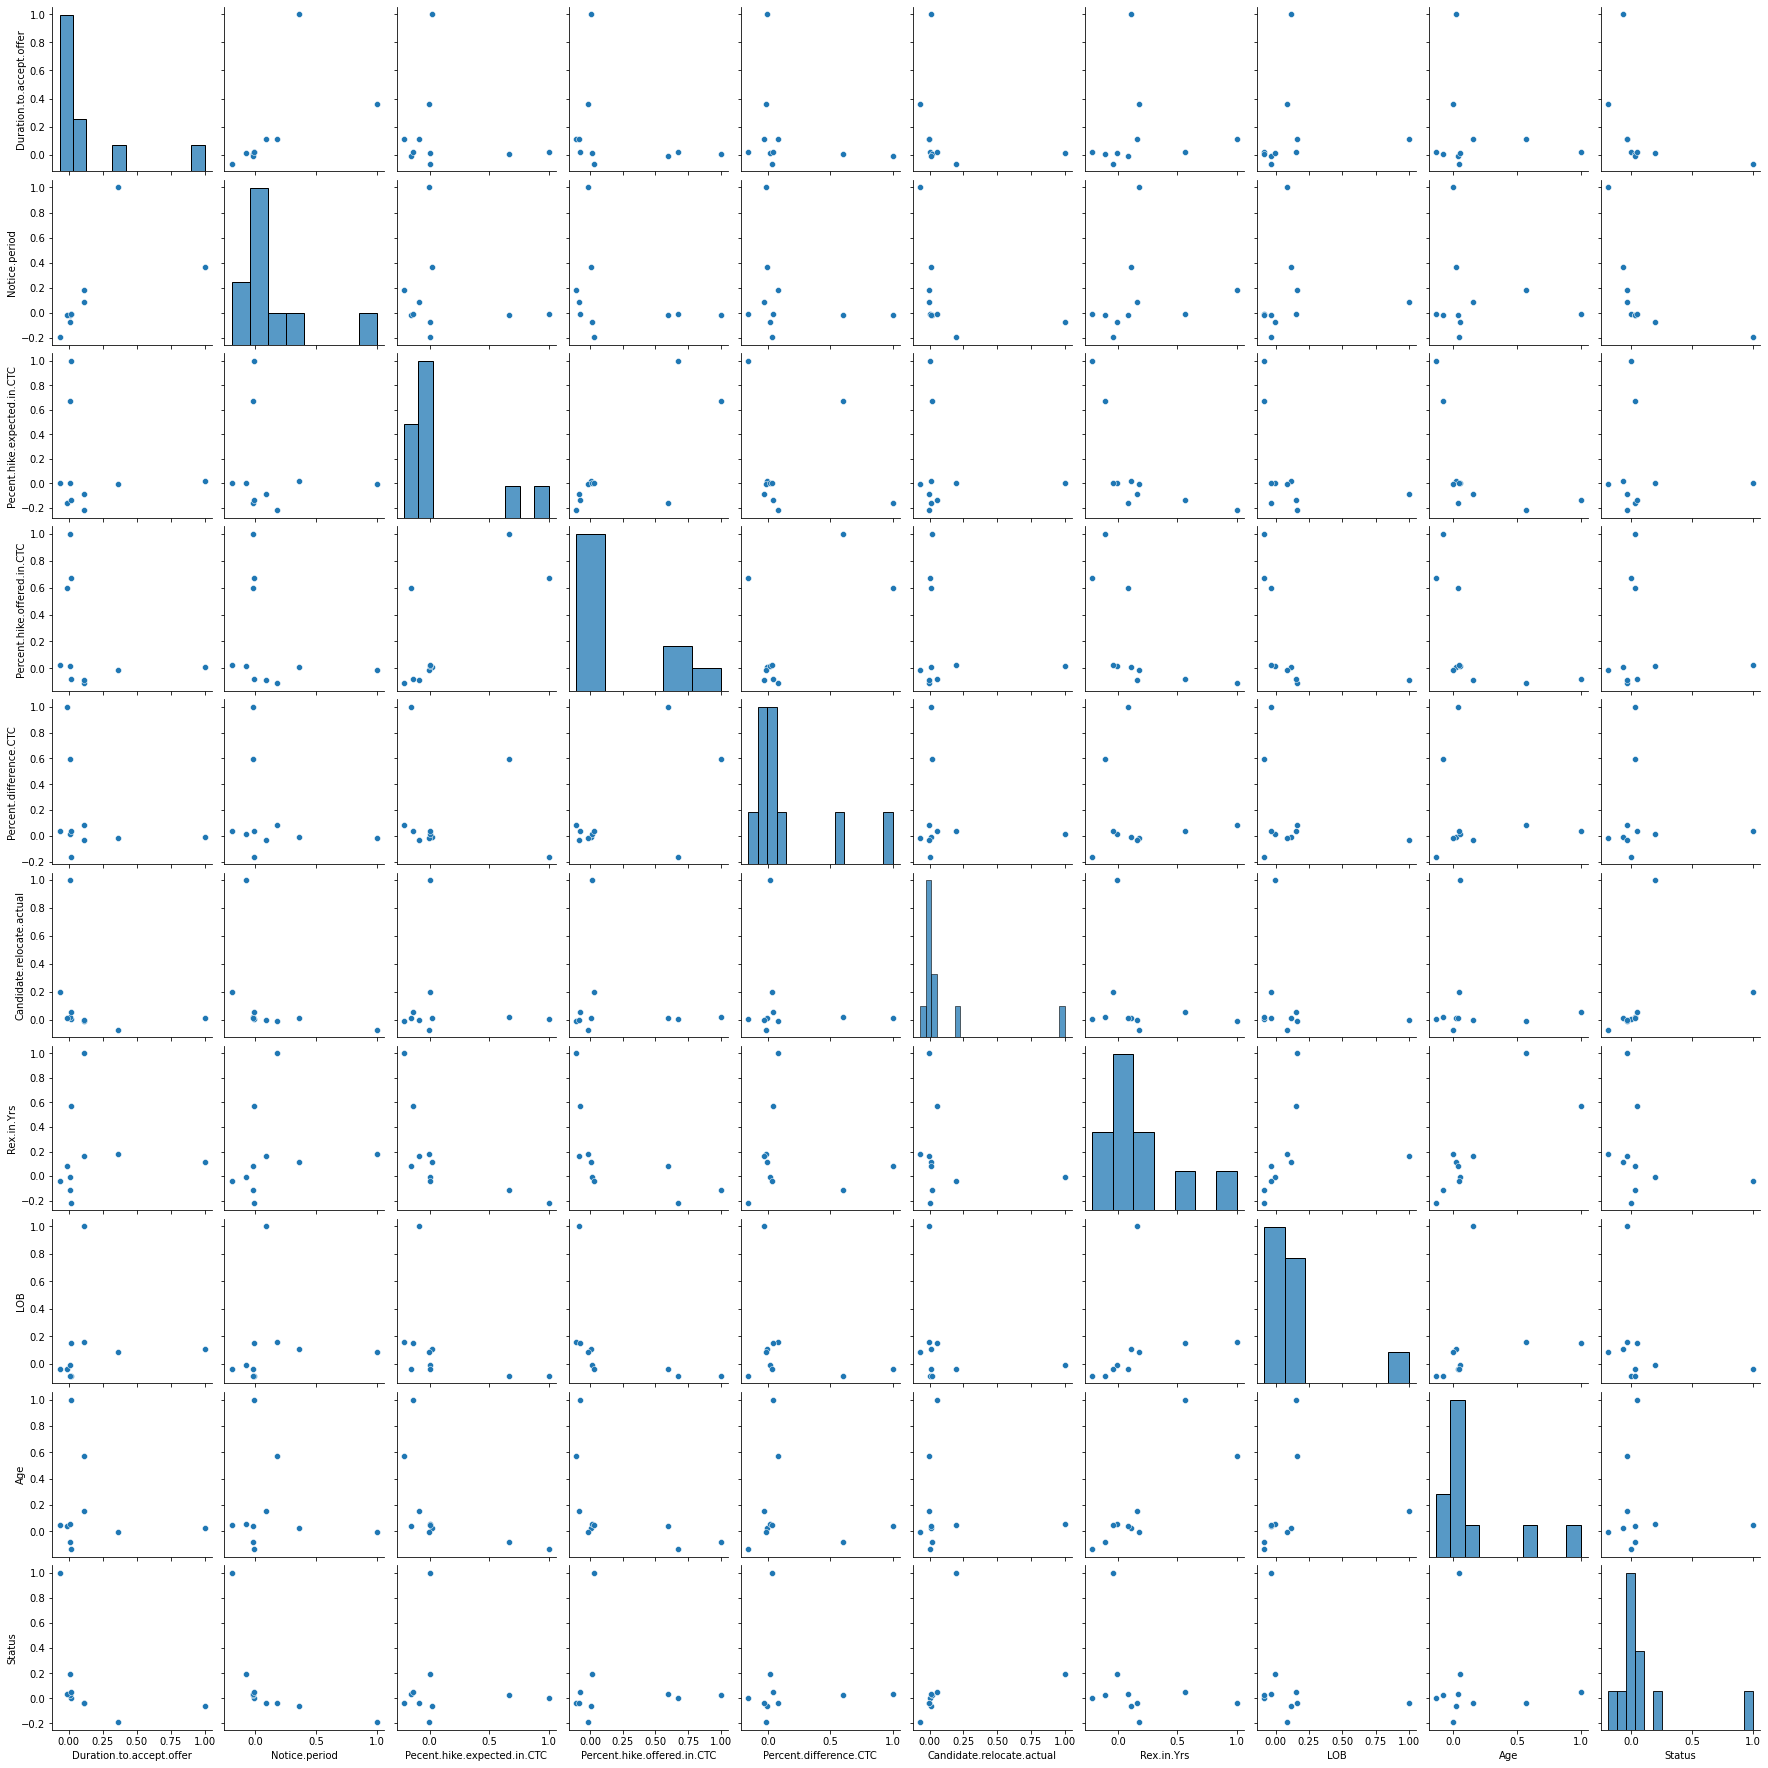

In [29]:
sns.pairplot(hr.corr())

<AxesSubplot:>

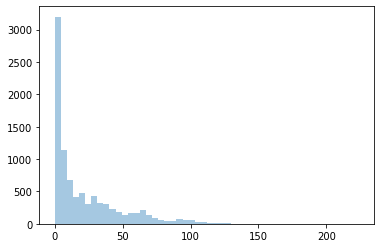

In [30]:
sns.distplot(x=hr["Duration.to.accept.offer"],kde=False)

<AxesSubplot:xlabel='Notice.period', ylabel='Duration.to.accept.offer'>

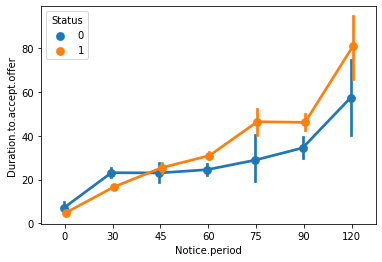

In [31]:
sns.pointplot(x="Notice.period",y="Duration.to.accept.offer",hue="Status",dodge=True,data=hr)

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(hr.drop("Status",axis=1),
                                                hr["Status"],test_size=0.2,
                                                random_state=101)

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30,criterion="entropy")
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [109]:
rdt_predictions = classifier.predict(X_test)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [111]:
print(confusion_matrix(y_test,rdt_predictions))

[[  79  268]
 [  64 1389]]


In [112]:
print(accuracy_score(y_test,rdt_predictions))

0.8155555555555556


In [113]:
print(classification_report(y_test,rdt_predictions))

              precision    recall  f1-score   support

           0       0.55      0.23      0.32       347
           1       0.84      0.96      0.89      1453

    accuracy                           0.82      1800
   macro avg       0.70      0.59      0.61      1800
weighted avg       0.78      0.82      0.78      1800



In [114]:
rdt_importance = classifier.feature_importances_

<AxesSubplot:>

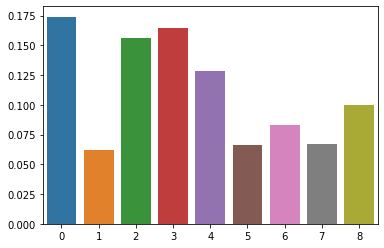

In [115]:
sns.barplot(x=list(range(9)),y=rdt_importance)

<AxesSubplot:xlabel='Status', ylabel='Duration.to.accept.offer'>

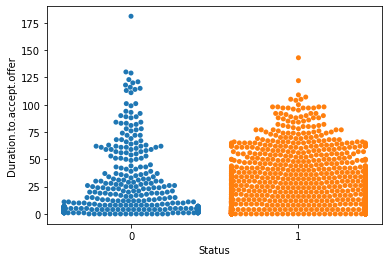

In [116]:
sns.swarmplot(x=y_test,y=X_test["Duration.to.accept.offer"])

If a candidate takes long time to accept offer its likely they will accept offer.

In [117]:
(hr[hr["Status"]==1]["Status"].count())/ hr["Status"].count()

0.8130695710157813

Churn rate is 81.306%